#**EE769 Introduction to Machine Learning**

#Programming Assignment – 3 : Deep Learning and Unsupervised Learning


**Name:** Prafull Pratap Bhosale

**Roll No.** 203010005


**Name:** Ojaswini Bhardwaj

**Roll No.** 213300011


# Q3: PCA

<a id="2"></a>
# Imports:

In [ ]:
#Basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler #used for 'Feature Scaling'
from sklearn.decomposition import PCA

<a id="3"></a>
# Read the data from URL

In [ ]:
#df is our original DataFrame
df = pd.read_csv("https://www.ee.iitb.ac.in/~asethi/Dump/DataPCA.csv")

In [ ]:
display(df)

,x1,x2,x3,x4,x5,x6,x7
0,0.840261,-1.088160,4.861744,4.273055,4.312457,-0.137834,0.076453
1,1.320591,-1.174113,5.247360,3.295027,4.283410,-0.363759,-0.170605
2,1.537909,-1.175882,5.556251,3.394183,3.971574,-0.888398,0.080617
3,0.363552,-1.130608,4.329890,5.547488,4.539732,0.342330,0.251953
4,1.567938,-1.114719,5.542104,2.493071,4.156157,-0.609694,-0.291367
...,...,...,...,...,...,...,...
185,0.894296,-1.270097,4.618647,4.005702,4.634847,0.156118,-0.215169
186,0.926559,-1.203508,4.766199,3.907673,4.538084,0.073321,-0.197924
187,1.678706,-1.227245,5.613809,2.864530,4.046335,-0.906304,-0.099063
188,1.693254,-1.323340,5.470576,3.023584,4.208331,-0.693895,-0.189082


<a id="4"></a>
# Exploration/Engineering:

First, we construct a new DataFrame, `X` that we can modify. `X` will begin as a 'copy' of the original DataFrame, `df`.

In [ ]:
X = df.copy()

Any missing values?

In [ ]:
X.isnull().sum()

x1    0
x2    0
x3    0
x4    0
x5    0
x6    0
x7    0
dtype: int64

Sweet! No missing values. That saves us quite a bit of work.

In [ ]:
X.head()

,x1,x2,x3,x4,x5,x6,x7
0,0.840261,-1.088160,4.861744,4.273055,4.312457,-0.137834,0.076453
1,1.320591,-1.174113,5.247360,3.295027,4.283410,-0.363759,-0.170605
2,1.537909,-1.175882,5.556251,3.394183,3.971574,-0.888398,0.080617
3,0.363552,-1.130608,4.329890,5.547488,4.539732,0.342330,0.251953
4,1.567938,-1.114719,5.542104,2.493071,4.156157,-0.609694,-0.291367


## Plot given data

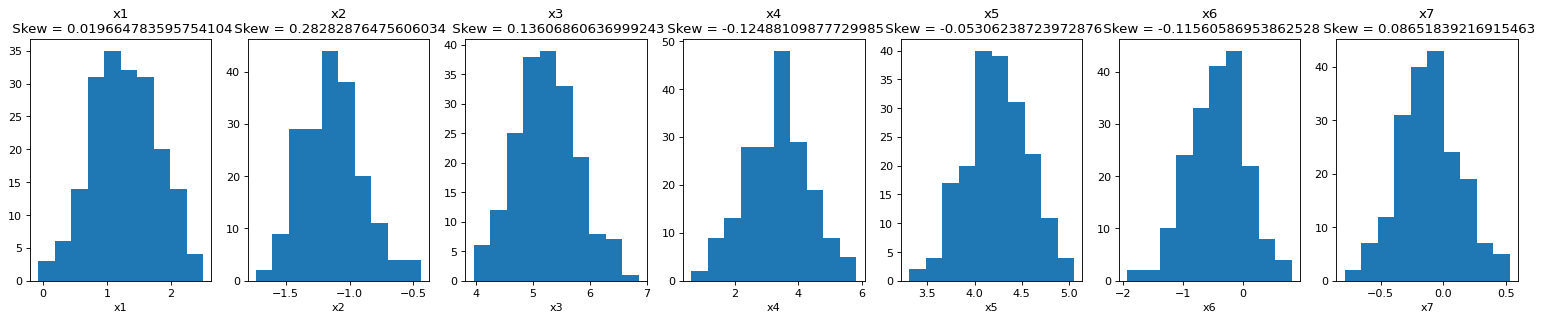

In [ ]:
# plot histograms of each columns to check the skewness
plt.figure(figsize=(24, 4), dpi=80)
cols_to_transform = []
i=1
for col in X.columns.values:
  colSkew = X[col].skew()
  pltTitle = col + '\n Skew = ' + str(X[col].skew())
  plt.subplot(1, len(X.columns), i).set_title(pltTitle)
  i = i+1
  plt.hist(X[col])
  plt.xlabel(col)
  if (abs(colSkew) > 0.6):
    cols_to_transform.append(col)
  #print(col + ': Skew = ', X[col].skew())

plt.show()

# Feature-scaling

To make each column zero mean and unit standard deviation

In [ ]:
#Initialize our scaler
scaler = StandardScaler()

In [ ]:
#Scale each column in numer
X_scaled = pd.DataFrame(scaler.fit_transform(X))

In [ ]:
X_scaled.head()

,0,1,2,3,4,5,6
0,-0.879702,0.203581,-0.717812,0.937130,0.240310,0.572178,0.817830
1,0.066901,-0.164833,-0.013778,-0.047812,0.151606,0.102283,-0.215624
2,0.495178,-0.172416,0.550176,0.052044,-0.800676,-0.988900,0.835247
3,-1.819170,0.021640,-1.688840,2.220573,0.934360,1.570859,1.551955
4,0.554357,0.089743,0.524348,-0.855438,-0.236998,-0.409231,-0.720773


# Train PCA

In [ ]:
pca = PCA(n_components=None) # c_components = None was specified so that we get directly get variance explained for different PCA dimensions in one shot
X_train_pca = pca.fit_transform(X_scaled) # Fit the model with X_scaled and apply the dimensionality reduction on X_scaled

# Plot the variance explained versus PCA dimensions

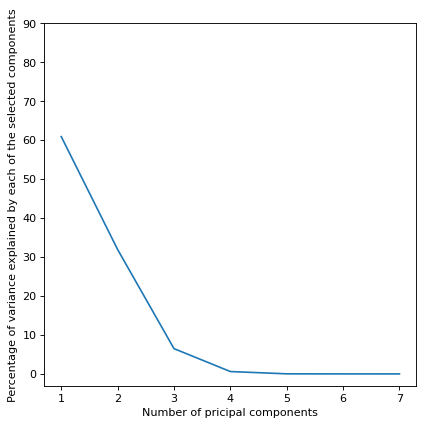

In [ ]:
# plot explained variance ration vs number of components
plt.figure(figsize=(6,6),dpi=80) # to specify width, height and dpi of plot
plt.plot(np.arange(1,pca.n_components_+1), pca.explained_variance_ratio_*100)
plt.xlabel('Number of pricipal components')
plt.ylabel('Percentage of variance explained by each of the selected components')
plt.yticks(np.arange(0,100,10))
plt.show()

In [ ]:
(1-pca.explained_variance_ratio_)*100 # calculate how much cumulative variance is explained when increase PCA dimensions

array([39.07294328, 68.05390327, 93.50437989, 99.39276142, 99.97839723,
       99.99801539, 99.99959951])

**Observations:**


1.   From above plot, we can see that onlt first 4 pricipal components are sufficient to recontruct the given data with very good accuracy.
2.   The variance captured by first 4 components is > 99.9 %



# Reconstruct the data with various numbers of PCA dimensions, and compute the MSE

In [ ]:
MSE_history = np.zeros(7)
i=0
for num_comp in range(1,8): # loop from 1 to 7 PCA dimensions
  pca1 = PCA(n_components=num_comp)
  X_train_pca1 = pca1.fit_transform(X_scaled)
  X_projected1 = pca1.inverse_transform(X_train_pca1)
  MSE_history[i] = np.sum((X_scaled - X_projected1) ** 2, axis=1).mean() # MSE loss between original and re-constructed data
  i=i+1

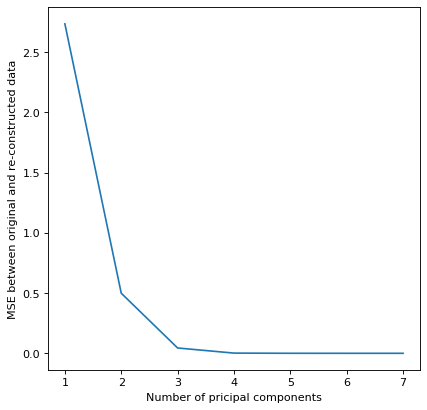

In [ ]:
# plot MSE loss between original and re-constructed data vs Number of PCA dimensions
plt.figure(figsize=(6,6),dpi=80)
plt.plot(np.arange(1,pca.n_components_+1),MSE_history)
plt.xlabel('Number of pricipal components')
plt.ylabel('MSE between original and re-constructed data')
plt.show()

In [ ]:
MSE_history

array([2.73510603e+00, 4.98879259e-01, 4.41858514e-02, 1.67915083e-03,
       1.66957206e-04, 2.80346157e-05, 6.93812116e-30])

**Observations:**


1.   With only 4 PCA dimensions, the MSE loss between original and re-constructed data was very small (~1.7e-3)
2.   This means we can use these first 4 PCA dimensions to re-construct data with substantial great accuracy.



References:

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.fit_transform

https://stackoverflow.com/questions/36566844/pca-projection-and-reconstruction-in-scikit-learn

https://scikit-learn.org/stable/auto_examples/cross_decomposition/plot_pcr_vs_pls.html#sphx-glr-auto-examples-cross-decomposition-plot-pcr-vs-pls-py